In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv('/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/Best datset_model perspective_AUC/Data/lucene-3.1.csv')
data = data.drop('File', axis=1)
X = data.iloc[:,0:]  #independent columns
y = data.iloc[:,-1]    #target column i.e Realbug
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

               Specs         Score
48     CountPath_Max  6.814585e+10
49    CountPath_Mean  7.317042e+09
58         Del_lines  5.616917e+05
57       Added_lines  2.064953e+05
2          CountLine  1.895193e+05
31         CountStmt  1.124913e+05
27     CountLineCode  1.118585e+05
23  CountLineCodeExe  9.716616e+04
33    CountSemicolon  9.117785e+04
28      CountStmtExe  9.090058e+04


In [2]:
## Load Data and preparing datasets

# Import for Load Data
from os import listdir
from os.path import isfile, join
import pandas as pd

# Import for Split Data into Training and Testing Samples
from sklearn.model_selection import train_test_split

train_dataset = pd.read_csv(('/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/Best datset_model perspective_AUC/Data/lucene-2.9.0.csv'), index_col = 'File')
test_dataset = pd.read_csv(('/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/Best datset_model perspective_AUC/Data/lucene-3.1.csv'), index_col = 'File')

outcome = 'RealBug'
features = ['CountPath_Max', 'CountPath_Mean', 'Del_lines', 'Added_lines', 'CountLine']
# commits - # of commits that modify the file of interest
# Added lines - # of added lines of code
# Count class coupled - # of classes that interact or couple with the class of interest
# LOC - # of lines of code
# RatioCommentToCode - The ratio of lines of comments to lines of code

# process outcome to 0 and 1
train_dataset[outcome] = pd.Categorical(train_dataset[outcome])
train_dataset[outcome] = train_dataset[outcome].cat.codes

test_dataset[outcome] = pd.Categorical(test_dataset[outcome])
test_dataset[outcome] = test_dataset[outcome].cat.codes

X_train = train_dataset.loc[:, features]
X_test = test_dataset.loc[:, features]

y_train = train_dataset.loc[:, outcome]
y_test = test_dataset.loc[:, outcome]

class_labels = ['Clean', 'Defective']

X_train.columns = features
X_test.columns = features
training_data = pd.concat([X_train, y_train], axis=1)
testing_data = pd.concat([X_test, y_test], axis=1)

In [3]:
test_dataset

,CountDeclMethodPrivate,AvgLineCode,CountLine,MaxCyclomatic,CountDeclMethodDefault,AvgEssential,CountDeclClassVariable,SumCyclomaticStrict,AvgCyclomatic,AvgLine,...,OWN_LINE,OWN_COMMIT,MINOR_COMMIT,MINOR_LINE,MAJOR_COMMIT,MAJOR_LINE,HeuBug,HeuBugCount,RealBug,RealBugCount
File,,,,,,,,,,,,,,,,,,,,,
lucene/backwards/src/test/org/apache/lucene/analysis/BaseTokenStreamTestCase.java,0,4,170,12,0,1,0,34,2,5,...,1.000000,0.000000,0,1,0,0,False,0,0,0
lucene/backwards/src/test/org/apache/lucene/analysis/TestAnalyzers.java,0,9,163,3,1,1,0,12,1,10,...,0.987805,0.000000,0,1,0,1,False,0,0,0
lucene/backwards/src/test/org/apache/lucene/analysis/TestASCIIFoldingFilter.java,0,528,1906,5,1,1,0,7,2,608,...,1.000000,0.000000,0,1,0,0,False,0,0,0
lucene/backwards/src/test/org/apache/lucene/analysis/TestCachingTokenFilter.java,1,21,110,2,0,1,0,5,2,26,...,1.000000,0.000000,0,1,0,0,False,0,0,0
lucene/backwards/src/test/org/apache/lucene/analysis/TestCharArraySet.java,0,21,180,10,0,1,1,17,3,25,...,1.000000,0.000000,0,1,0,0,False,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
solr/src/webapp/src/org/apache/solr/servlet/SolrDispatchFilter.java,2,21,414,25,0,2,1,59,5,29,...,0.355072,0.428571,0,5,4,4,False,0,0,0
solr/src/webapp/src/org/apache/solr/servlet/SolrRequestParsers.java,0,11,413,13,1,1,4,48,3,15,...,0.590799,0.000000,0,3,0,2,False,0,0,0
solr/src/webapp/src/org/apache/solr/servlet/SolrServlet.java,0,17,150,11,1,1,1,18,4,21,...,0.489933,0.750000,0,4,2,3,False,0,0,0


In [4]:
from sklearn.ensemble import RandomForestClassifier
our_rf_model = RandomForestClassifier(random_state=0)
our_rf_model.fit(X_train, y_train)  

RandomForestClassifier(random_state=0)

In [5]:
y_test.value_counts()

0    2699
1     107
Name: RealBug, dtype: int64

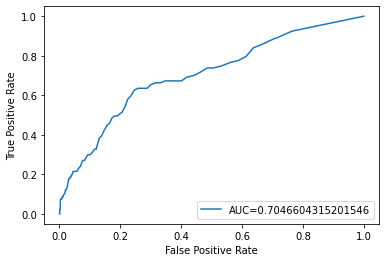

In [6]:
from sklearn import metrics
from matplotlib import pyplot as plt
y_pred_proba = our_rf_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()